# Loading data and libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plot

magic_data = pd.read_csv("sample_data/magic04.data", header=None, names=['fLength', 
                          'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
                          'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'])

magic_data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


# Missing values detection

Before applying any models we must make sure that there are no missing values in our data.

In [9]:
magic_data.isna().any()

fLength     False
fWidth      False
fSize       False
fConc       False
fConc1      False
fAsym       False
fM3Long     False
fM3Trans    False
fAlpha      False
fDist       False
class       False
dtype: bool

There are no missing values in our dataset.

# Exploratory Data Analysis (EDA)

## This section shows the distribution of the features

<Figure size 432x288 with 0 Axes>

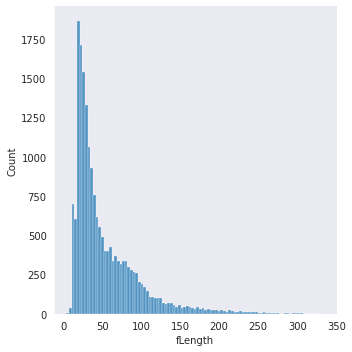

<Figure size 432x288 with 0 Axes>

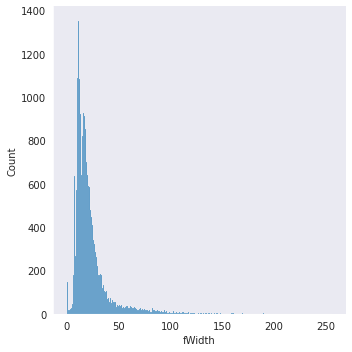

<Figure size 432x288 with 0 Axes>

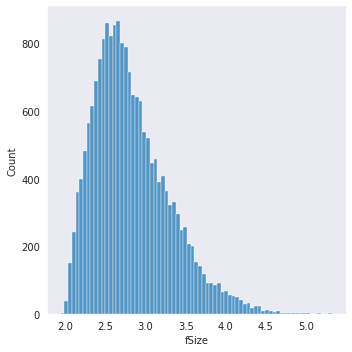

<Figure size 432x288 with 0 Axes>

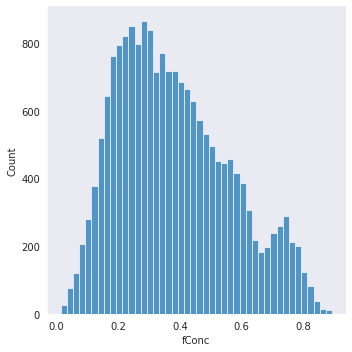

<Figure size 432x288 with 0 Axes>

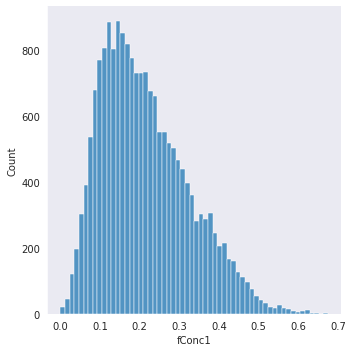

<Figure size 432x288 with 0 Axes>

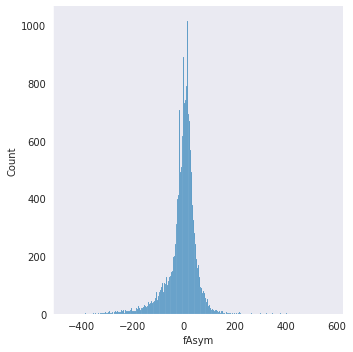

<Figure size 432x288 with 0 Axes>

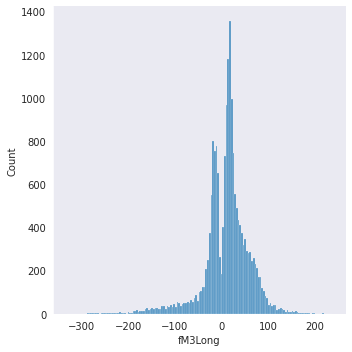

<Figure size 432x288 with 0 Axes>

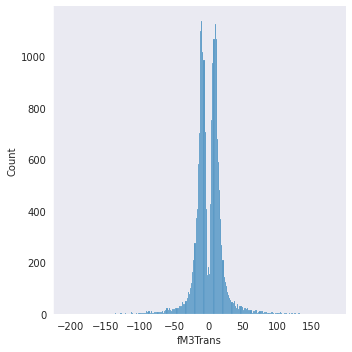

<Figure size 432x288 with 0 Axes>

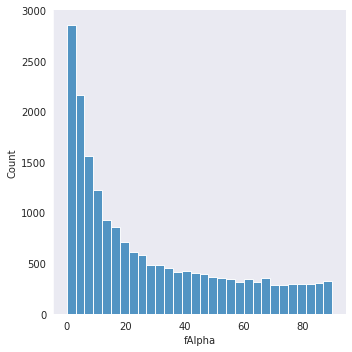

<Figure size 432x288 with 0 Axes>

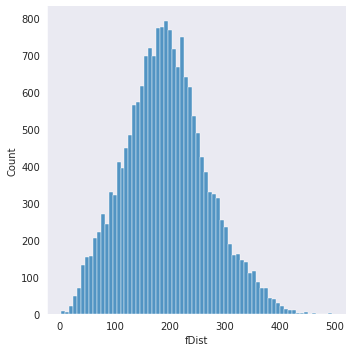

<Figure size 432x288 with 0 Axes>

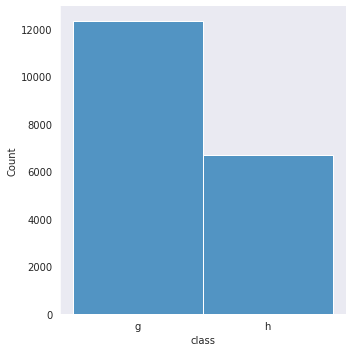

In [10]:
import warnings
warnings.filterwarnings('ignore')
sb.set_style("dark")

for column in magic_data.columns:
  plot.figure()
  sb.displot(magic_data[column])

## Seaborn Pairplot

In [11]:
magic_data['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

In [12]:
magic_data.isna().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

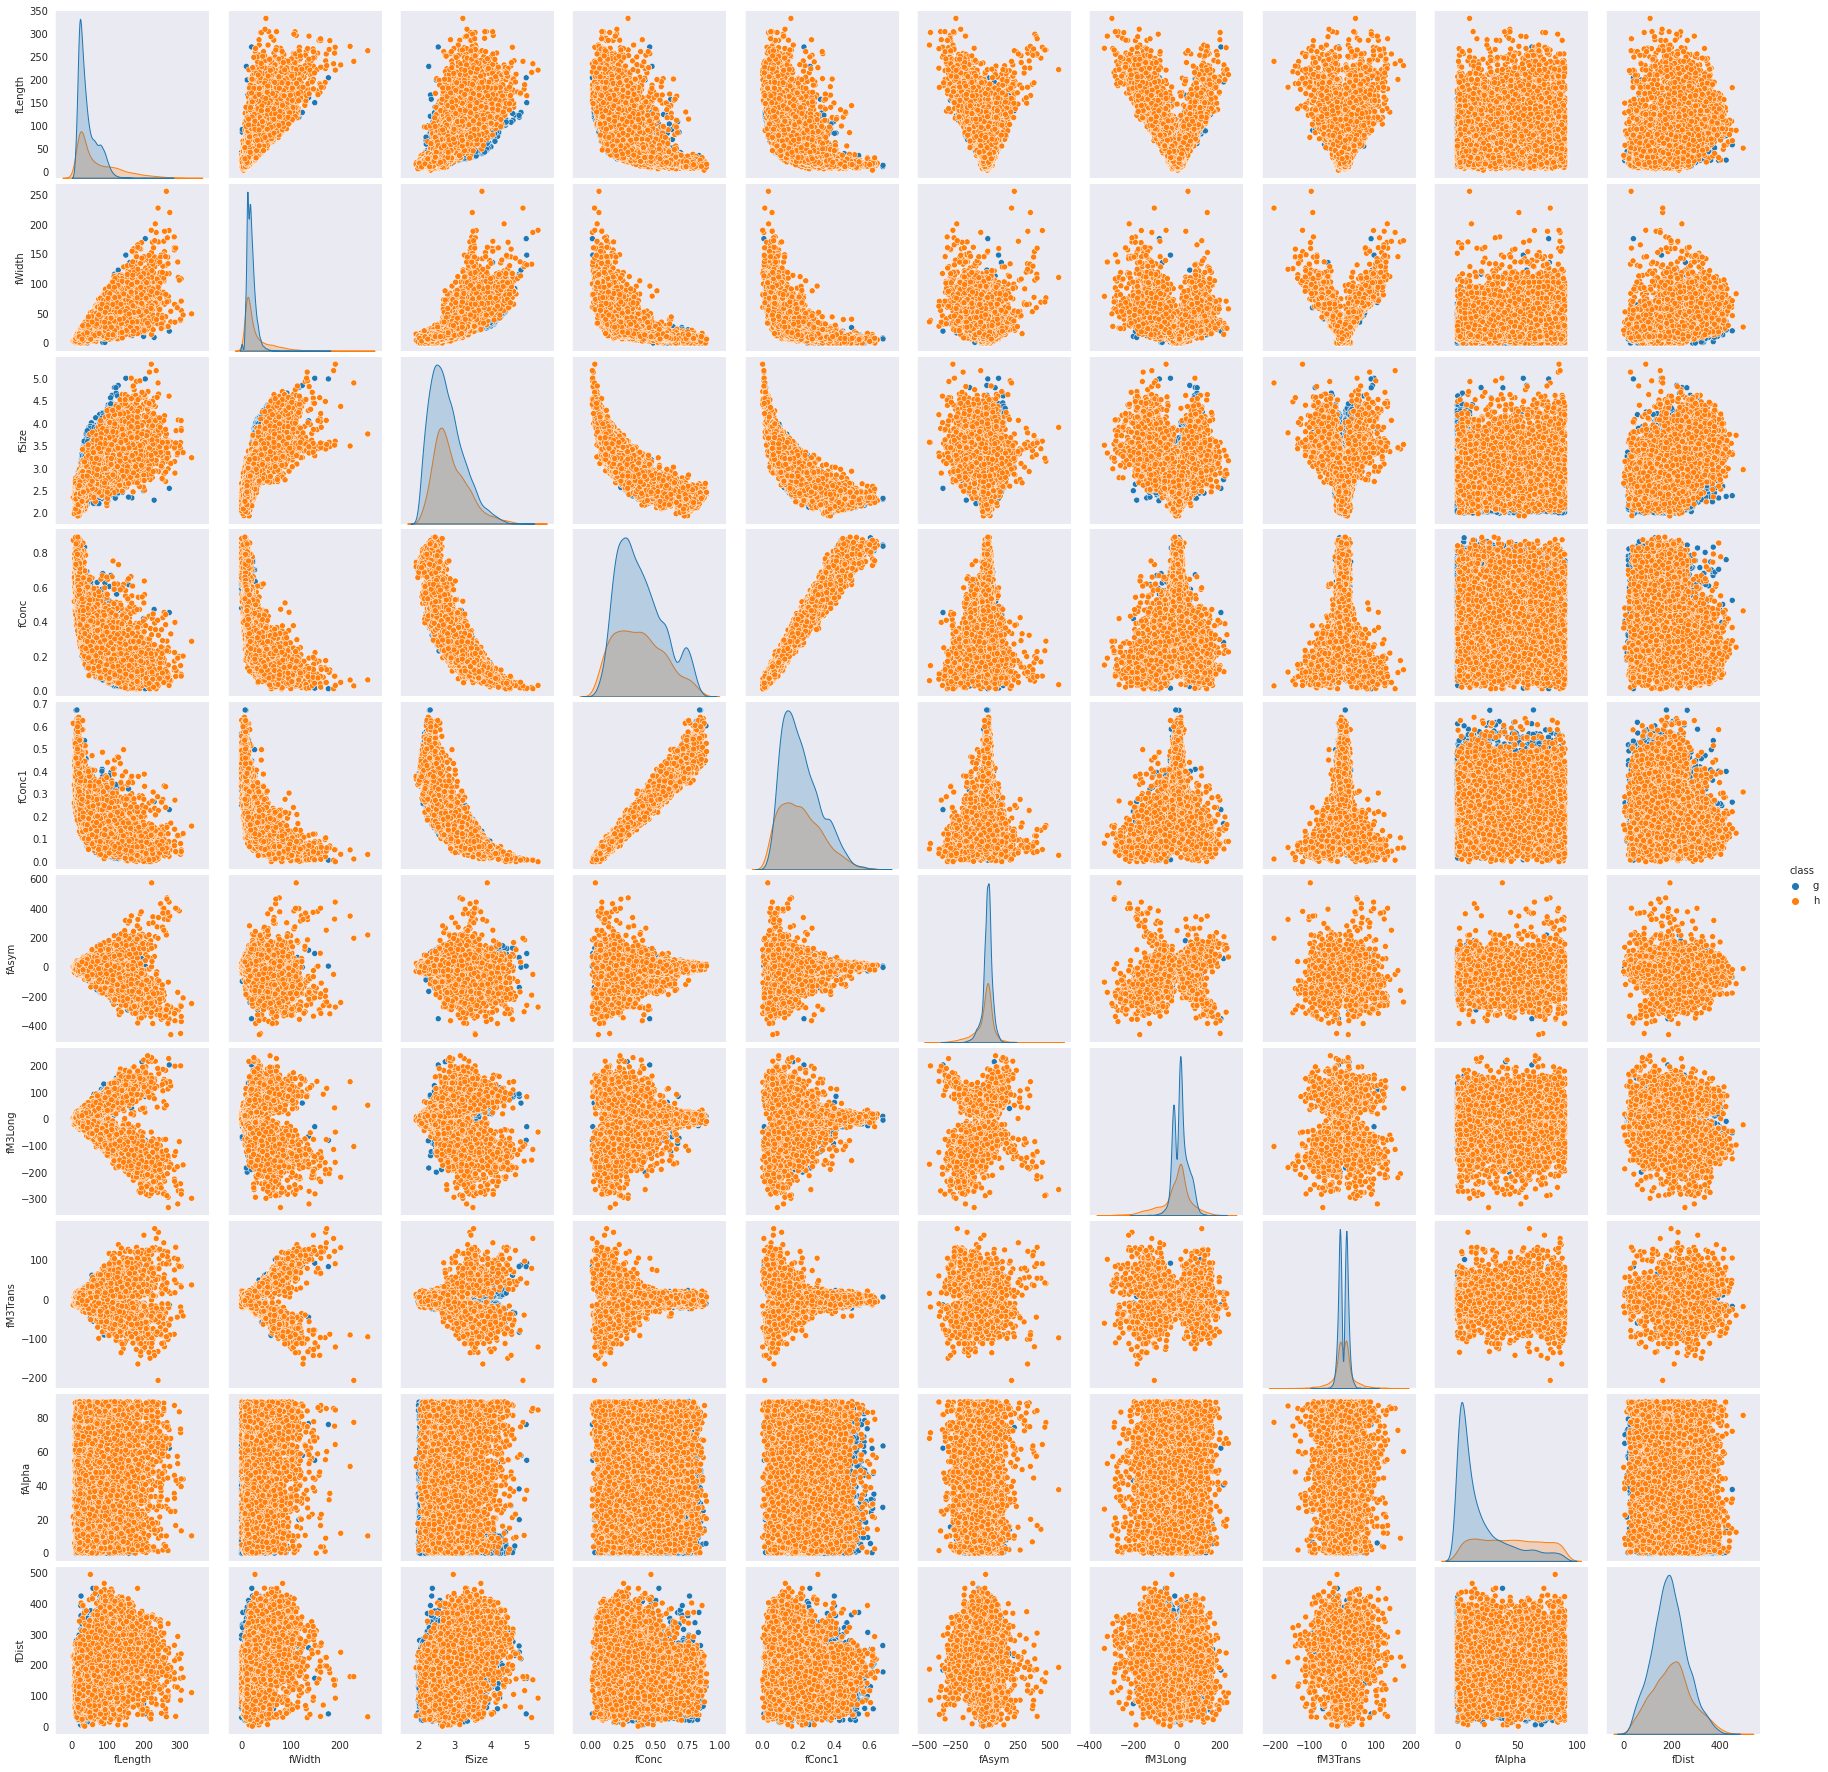

In [13]:
sb.pairplot(magic_data, hue="class")

## Heatmap

<Axes: >

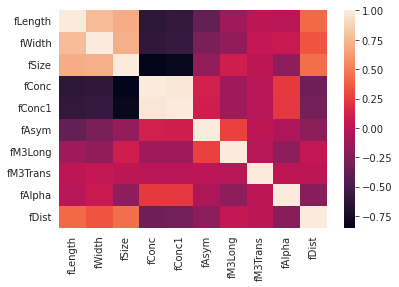

In [14]:
sb.heatmap(magic_data.corr())

## PCA approach for dimensionality reduction

<Axes: >

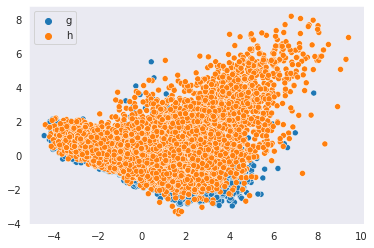

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = make_pipeline(StandardScaler(), PCA())

X = magic_data.drop('class', axis=1)
result = pipeline.fit_transform(X)

new_result = np.hstack([result, np.array(magic_data['class'])[:, np.newaxis]])

sb.scatterplot(data=new_result, x=new_result[:,0], 
               y=new_result[:,1], hue=new_result[:,-1])

# Classification

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


Y = []
for el in magic_data['class']:
    if el == 'g':
        Y.append(0)
    else:
        Y.append(1)
Y = list(Y)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

## Naive Bayes

In [18]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
prediction = nb.predict(X_test)

print(f"accuracy: {accuracy_score(Y_test, prediction)}")
print(f"f1: {f1_score(Y_test, prediction)}")

accuracy: 0.7281808622502629
f1: 0.495609756097561


## Linear Discriminant Analysis (LDA)

In [19]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
prediction = lda.predict(X_test)

print(f"accuracy: {accuracy_score(Y_test, prediction)}")
print(f"f1: {f1_score(Y_test, prediction)}")

accuracy: 0.7904837013669821
f1: 0.6440375167485486


## Quadratic Discriminant Analysis (QDA)

In [20]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train)
prediction = qda.predict(X_test)

print(f"accuracy: {accuracy_score(Y_test, prediction)}")
print(f"f1: {f1_score(Y_test, prediction)}")

accuracy: 0.788906414300736
f1: 0.6170720076299475


## Conclusion

As we can see NB has an accuracy of 0.728, LDA has an accuracy of 0.790 and QDA about the same with 0.788. The results are not bad even for NB but the other models manage to achieve better results.

Accuracy alone is not too informative regarding a model's effectiveness. Precision and recall are also important. The f score is a combination of the two.
NB achieved an f1 score of 0.495, LDA achieved 0.644 and QDA 0.617. 

This means LDA gave us the best overall result. 

My guess is that the reason Naive Bayes is less accurate is because it assumes that the attributes are not related at all. This is probably wrong.